In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [2]:
# Variables
sRate = 44100 # sample rate in Hertz
freq1 = 50.0 # frequency of first sine wave
freq2 = 100.0 # frequency of second sine wave
amplitude1 = 10 # amplitude of first wave
amplitude2 = 5 # amplitude of second wave
numPeriods = 10 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

In [5]:
x

array([  0.00000000e+00,   2.26757884e-05,   4.53515768e-05, ...,
         9.99995465e+00,   9.99997732e+00,   1.00000000e+01])

In [6]:
len(x)

441000

In [7]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)

In [8]:
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)

In [9]:
sampled_f1 = [f1(i) for i in x]

In [10]:
sampled_f2 = [f2(i) for i in x]

In [11]:
sampled_fcomb = [(f1(i)+f2(i)) for i in x]

(-25, 25)

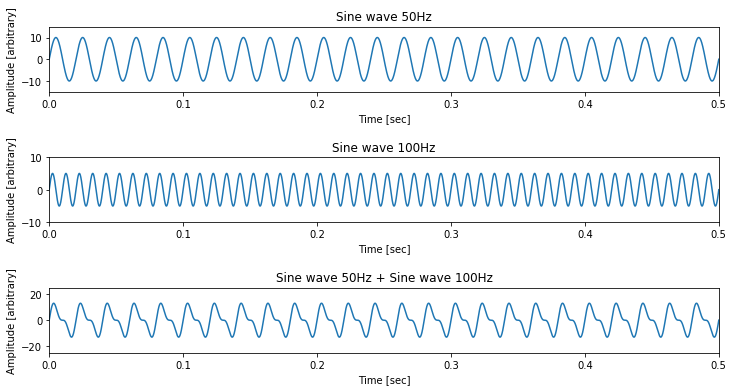

In [12]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-15, 15)

plt.subplot(312)
plt.plot(x, sampled_f2)
plt.title('Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-10, 10)

plt.subplot(313)
plt.plot(x, sampled_fcomb)
plt.title('Sine wave 50Hz + Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-25, 25)

In [13]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

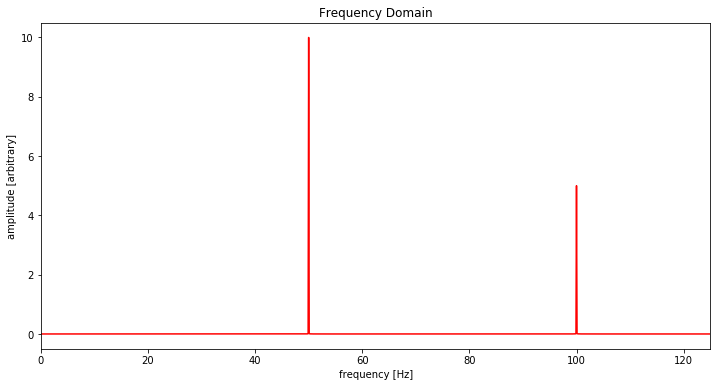

In [14]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 125)
plt.plot(frequencies, magnitude, 'r')


In [15]:
sampled_fcomb

[0.0,
 0.14247316770917506,
 0.2849282600117875,
 0.4273472046200365,
 0.56971193548303889,
 0.71200439590377584,
 0.85420654165422383,
 0.99630034408806667,
 1.1382677932503844,
 1.2800909009837143,
 1.4217517040298842,
 1.5632322671270136,
 1.7045146861010858,
 1.8455810909514809,
 1.9864136489298914,
 2.1269945676119972,
 2.2673060979613275,
 2.407330537384702,
 2.5470502327786613,
 2.6864475835663004,
 2.8255050447239123,
 2.9642051297968552,
 3.1025304139040588,
 3.2404635367305956,
 3.3779872055077171,
 3.515084197979804,
 3.6517373653576346,
 3.7879296352574112,
 3.9236440146249647,
 4.0588635926445917,
 4.1935715436319274,
 4.3277511299103386,
 4.4613857046702332,
 4.5944587148107701,
 4.7269537037634031,
 4.8588543142967122,
 4.9901442913019913,
 5.1208074845590312,
 5.2508278514816009,
 5.380189459842053,
 5.5088764904745595,
 5.6368732399564516,
 5.7641641232671237,
 5.8907336764240146,
 6.016566559095156,
 6.1416475571877607,
 6.2659615854123718,
 6.38949368982209,
 6.51222

In [16]:
print 'Opening data file...'
dataFile = open('2sineXHz.dat', 'wt')

print 'Writing data file...'
for i in range(numSamples):
    dataElement = str(sampled_fcomb[i]) +'\n'
    dataFile.write(dataElement)

Opening data file...
Writing data file...
